In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
#autoreload to take in changes from outside
%load_ext autoreload
%autoreload 2

In [30]:
def missing_zero_values_table(df):
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
        columns = {0:'Zero Values',
                   1:'Missing Values',
                   2:'% of Total Values'})
    mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
    mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[mz_table.iloc[:,1] != 0].sort_values( '% of Total Values', ascending=False).round(1)
    
    return mz_table

In [32]:
pd.set_option("display.max_columns", 100)

In [33]:
features_df = pd.read_csv("training_set_features.csv")
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (26707, 36)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [34]:
missing_zero_values_table(features_df)

,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
employment_occupation,0,13470,50.4,13470,50.4,object
employment_industry,0,13330,49.9,13330,49.9,object
health_insurance,1736,12274,46.0,14010,52.5,float64
income_poverty,0,4423,16.6,4423,16.6,object
doctor_recc_h1n1,19139,2160,8.1,21299,79.8,float64
doctor_recc_seasonal,16453,2160,8.1,18613,69.7,float64
rent_or_own,0,2042,7.6,2042,7.6,object
employment_status,0,1463,5.5,1463,5.5,object
marital_status,0,1408,5.3,1408,5.3,object
education,0,1407,5.3,1407,5.3,object


In [8]:
labels_df = pd.read_csv('training_set_labels.csv')
print('labels_df.shape',labels_df.shape)
labels_df.head()

labels_df.shape (26707, 3)


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [46]:
features_df['child_under_6_months'].isna().sum()

820

In [48]:
features_df['health_insurance'].isna().sum()

12274

In [13]:
#Checks that the number of rows match up. Will error if the two arrays don't match up 
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

In [36]:
#Merge training dataset and labels
entire_df = pd.merge(features_df, labels_df, on="respondent_id", how='inner')
entire_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [40]:
#Work on poverty column
def fillpoverty(row):
    if row['age_group'] == "65+ Years" and row['employment_status'] == "Not in Labor Force":
        return "Retired"
    elif row['employment_status'] == "Unemployed" or row['employment_status'] == "Not in Labor Force":
        return "Unemployed"
    else:
        return "N/A"

In [41]:
entire_df["income_poverty"] = entire_df.apply(lambda x: fillpoverty(x) if pd.isnull(x['income_poverty']) else x['income_poverty'], axis = 1)

In [42]:
#prune out all the null employment_status
entire_df = entire_df[entire_df['employment_status'].notna()]

# H1N1_Vaccine and Seasonal Vaccine

Text(0, 0.5, 'h1n1_vaccine')

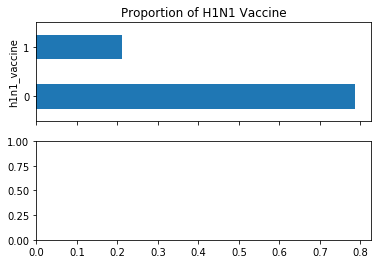

In [50]:
#Show distribution between h1n1_vaccine and Seasonal Vaccine
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]

#H1N1 Vaccine
labels_df['h1n1_vaccine'].value_counts().div(n_obs).plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
ax[0].set_ylabel("h1n1_vaccine")

#Seasonal Vaccine
labels_df['seasonal_vaccine'].value